# Deteccion de Anomalias (Anomaly Detection)
La deteccion de anomalias consiste en encontrar muestras fuera de lo comun en los datos. Tambien la llaman "outlier dectection".

## Aplicaciones:
* Fraude, seguros, tarjetas de credito.
* Errores de manufactura (ejemplo de los tornillos).
* Sistemas de salud. Un tumor es una anomalias.
* Prevencion de crimen. Las camaras pueden detectar situaciones inusuales.
* etc.

La matematica que vamos a estudiar es la la **distribucion normal** .
Pensemos en el caso mas simple $x \in \mathbb{R}$.

$$p(x ; \mu, \sigma^2) = \mathcal{N}(\mu, \sigma^2) =
\frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e}^{-\frac{x - \mu)^2}{2 \sigma^2}} $$
donde $\mu, \sigma \in \mathbb{R}$ son la media y desviacion estandard.

Para poder programar esta funcion debemos pensar que los parametros $\mu, \sigma$ se calculan de las formulas

$$ \mu = \frac1m \sum_{i=1}^m x^{(i)} $$
$$ \sigma^2 = \frac1m \sum_{i=1}^m (x^{(i)} - \mu)^2 $$

Para determinar si una muestra es anomala debemos calcular su probabilidad
la cual debe estar bajo un umbral $\epsilon$ para considerarla anomala.

Recordemos, de la estadistica basica,

$$P( a \le x \le b) = \int_a^b p(x; \mu, \sigma^2) dx. $$

La Figura 4.26 ilustra dos gaussianas.


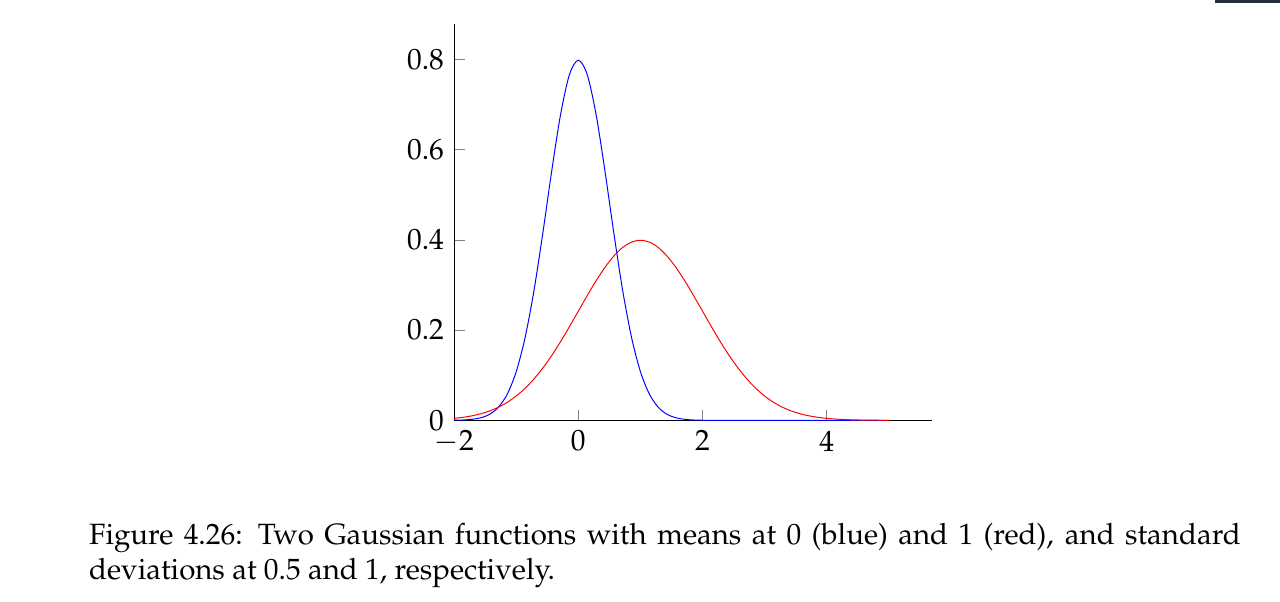

La curva azul tiene media $\mu=0$ mienras que la roja tiene media $\mu=1$.
La desviacion estandard en la azul $\sigma=0.5$ y en la roja es $1$. Entre mas pequenha la desviacion estandard, mas concentrada (spiky) es la figura.

En la realidad los datos para ML son en $\mathbb{R}^n$ entonces en este sentido
Asumimos entonces muestras $x^{(i)} \in \mathbb{R}^n$, $i=1,2, \cdots, m$.

$$\mu = \frac1m \sum_{i=1}^m  x^{(i)}$$
$$ \sigma^2 = \frac1m \sum_{i=1}^m \| x^{(i)}- \mu \|^2 $$
Estas son ya ecuaciones vectoriales. Si nos fijamos en un featue $j$, tenemos

$$\mu_j = \frac1m \sum_{i=1}^m x_j^{(i)}  $$
y
$$\sigma_j^2 = \frac1m \sum_{i=1}^m (x_j^{(i)} - \mu_j)^2 $$

Estrictamene existe la definicion de "non bias estimators". En esta definicion
la varianza seria

$$\sigma_j^2 = \frac{1}{m-1} \sum_{i=1}^m (x_j^{(i)} - \mu_j)^2 $$

Debemoms entonces definir la distribucion Gaussiana multivaridada.
Si tenemos $x^{(i)}$ variables aleatorias **independientes**  con
medias $\mu_i$, y varianzas $\sigma_i^2$ entonces

$$p(x^{(i)}; \mu , \sigma^2) = \prod_{j=1}^n p(x_j^{(i)}; \mu_j, \sigma_j^2) =  \frac{1}{\sqrt{(2 \pi)^n \prod_{j=1}^n \sigma_j^2}}
\exp \left (  -\sum_{j=1}^n \frac{(x_j^{(i)} - \mu_j)^2}{2 \sigma_j^2} \right ) \tag{0} $$

La idea para seleccionar una muestra como anomala es asumir un umbral (threshold) $\epsilon$ de forma que la muestra es anomala si

$$p(x^{(i)}; \mu, \sigma^2) < \epsilon. $$

## Distribucion Normal Multivariada.
En general debemos definir dos parametros importantes.

$$\mu_i = \frac1m \sum_{j=1}^m x_i^{(j)} $$
Esto define un vector de medias, una en cada dimension.

La otra definicion importante es la **matriz de covarianza $\Sigma$**

$$\Sigma = \frac1m (X - \mu)^T ( X - \mu),  $$
donde $X$ es la matriz de datos.  La matriz $\Sigma^{-1}$ se llama la matriz de **concentracion**.


Con esto definimos la funcion de probabilidad Gaussiana multivariable como

$$p(x, \mu, \Sigma) = \mathcal{N}(\mu,  \Sigma) =
\frac{1}{\sqrt{ (2 \pi)^n | \det( \Sigma ) |}}
\mathrm{e}^{-\frac12 (x - \mu)^T \Sigma^{-1} (x - \mu)} $$
Implicitamente estamos diciendo que la matriz de covarianza es invertible (no singular). Por la forma como se definio es positiva definida.

Una forma que se usa en estadistica para definir la matriz de covarianza es

$$\Sigma_{ij} = \text{cov} [ x^{(i)}, x^{(j)}] = \mathbb{E} [(x^{(i)}-\mu_i)^T (x^{(j)} - \mu_j) ] \tag{1} $$


Intepretemos un poco la matriz de covarianza. El exponente de la exponencial en la Ecuacion (1) es una **forma cuadratica**. Las formas cuadraticas son parabolas, elipses, hiperbolas. Como la matriz $\Sigma$ es positiva definida, tambien lo es $\Sigma^{-1}$ y esto quiere decir que la representacion (curvas o superficies de nivel) son elipticas.  La Figura 4.27 ilustra algunas de estas formas cuadraticas para varias formas de matriz de covarianza en 2D usando Matlab.


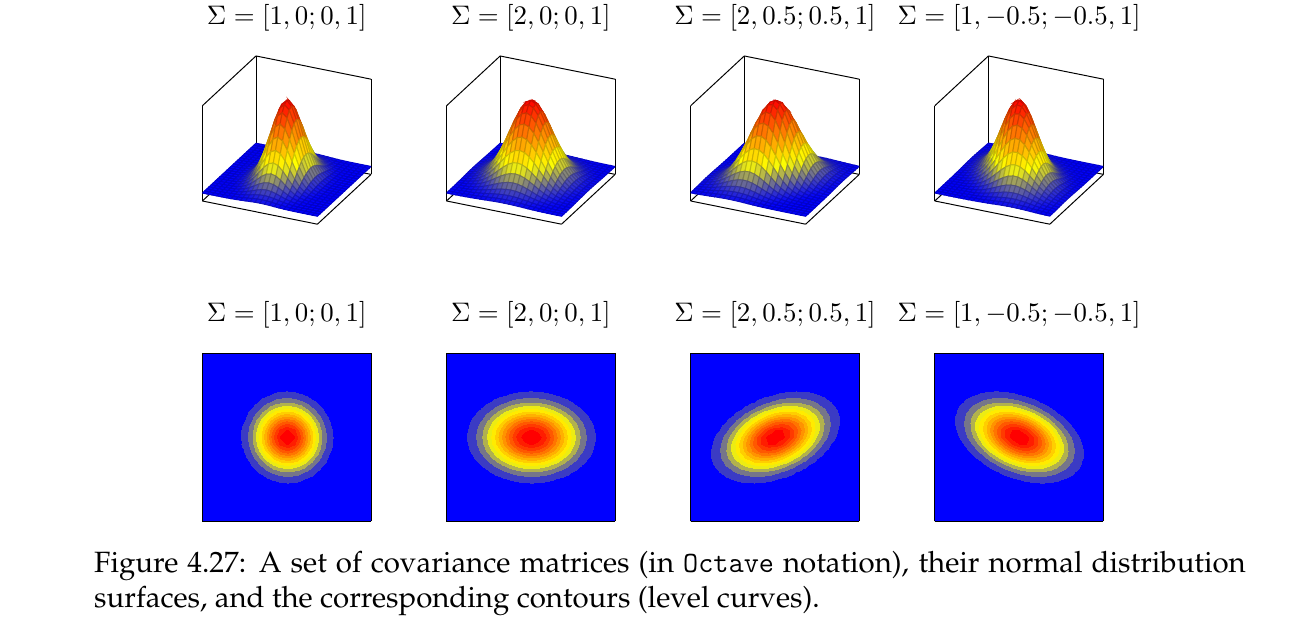

La notacion de Matlab es, por ejemplo, la matriz $\Sigma = [2,0; 0,1$ es


$$\begin{pmatrix} 2 & 0 \\ 0 & 1 \end{pmatrix}  $$
La Figura 4.27 muestra las Gaussianas correspondiente a las matrices de covarianza alli definidas (piense que las medias son 0). Las curvas de nivel son elipses y puden estar alineadas con los ejes (caso matriz diagonal) o no alineadas con los ejes (matriz no diagonal). Las curvas de nivel estan definidas por

$$-\frac12 (x - \mu)^T \Sigma^{-1} (x - \mu) = \text{constante}  $$

Observemos que si la matriz de covarianza es diagonal, volvemos a la representacion (0).

Si $\Sigma$ es diagonal

$$\Sigma = \begin{pmatrix}
\sigma_1^2 & 0 & \cdots & \cdots & \cdots & 0 \\
0 &\sigma_2^2 & \ddots & & & \vdots  \\
\vdots & \ddots & \sigma_3^2 & \ddots & & \vdots \\
\vdots & & \ddots  & \ddots & \ddots & \vdots \\
\vdots & & & \ddots & \ddots & 0 \\
0 & \cdots & \cdots & \cdots & 0 & \sigma_n^2
\end{pmatrix} $$

Cada $\sigma_i^2 > 0$.  La inversa $\Sigma^{-1}$ esta dada por


$$\Sigma^{-1} = \begin{pmatrix}
\sigma_1^{-2} & 0 & \cdots & \cdots & \cdots & 0 \\
0 &\sigma_2^{-2} & \ddots & & & \vdots  \\
\vdots & \ddots & \sigma_3^{-2} & \ddots & & \vdots \\
\vdots & & \ddots  & \ddots & \ddots & \vdots \\
\vdots & & & \ddots & \ddots & 0 \\
0 & \cdots & \cdots & \cdots & 0 & \sigma_n^{-2}
\end{pmatrix} $$

Recordemos la normal multivariada.

$$p(x, \mu, \Sigma) = \mathcal{N}(\mu,  \Sigma) =
\frac{1}{\sqrt{ (2 \pi)^n | \det( \Sigma ) |}}
\mathrm{e}^{-\frac12 (x - \mu)^T \Sigma^{-1} (x - \mu)} $$

Calculemos el determinante en el denominador.

$$\det \Sigma = \prod_{j=1}^n \sigma_j^2 $$
De forma que el coeficiente de la Gaussiana es

$$\frac{1}{\sqrt{(2 \pi)^n | \det \Sigma |}} =
\frac{1}{\sqrt{(2 \pi)^n \prod_{j=1}^n \sigma_j^2}}$$

Que corresponde a la Ecuacion (0).

Ahora vamos para el exponente.

$$-\frac12 (x^{(i)} - \mu)^T \Sigma^{(-1)} (x^{(i)} - \mu) = -\frac12
\sum_{j=1}^n \frac{(x_j^{(i)} - \mu_j)^2}{\sigma_j^2} $$
Este tambien corresponde a la Ecuacion (0).


Ya se tiene la teoria y pensemos cual seria la implementacion.

Asumamos que los parametros son estadisticamente independientes. Es decir,
que la matriz de covarianza es diagonal.
1. Seleccionar las muestras $x^{(i)}$ para probar.
2. Encuentre las medias $\mu_1, \mu_2, \cdots, \mu_n$ y varianzas
$\sigma_1^2, \sigma_2^2, \cdots , \sigma_n^2$
mediante el uso de las formulas

$$ \mu_i = \frac1m \sum_{j=1}^m x_i^{(j)} $$
$$\sigma_i^2 = \frac1m \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2 $$

3. Calcule la probabilidad de cada muestra $x_i$

$$p(x) = \prod_{i=1}^n p(x^{(i)}; \mu_i, \sigma_i^2)  =
\prod_{i=1}^n \frac{1}{\sqrt{ 2 \pi \sigma_j^2}}
\mathrm{e}^{-\sum_{i=1}^n \frac{(x^{(i)} - \mu_i)^2}{2 \sigma_i^2}} $$

4. Verifique si $p(x^{(i)}) < \epsilon$. Si fuese asi, esa muestra es anomala.

Como se calcula el umbral $\epsilon$. Tarea de lectura.

### Que pasa si los datos no se ajustan a una distribucion normal?
Los datos, estadisticamente se pueden ajustar mas a otras distribuciones. Por ejemplo

* Exponencial
* Poisson
* log normal distribution
* etc.

Estas a su vez tienen hiperparametros que toca calcular.

Otra cosa que se puede hacer es ajustar la distribucion para que se asimile a una normal. Trucos para eso hay, algunos son

* $x \to \log(x + c)$ conde $c$ es constante
* $x \to \sqrt{x}$
* etc.

# Sistemas de recomendacion y OCR (Optical Character Recognition).
Posiblemente con el mayor impacto economico en los mercados.
Por ejemplo:

* Encontrar canciones en Spotify. Spotify sugiere canciones.
* Cupones para Walmart (Exito).
* Sugerencias de peliculas en Netflix, Hulu, HBO
* Libros en Amazon
* demas.

Vamos a estudiar dos sistemas de recomendacion

* filtro basado en contenido
* filtro colaborativo.

## Filtro basado en contenido.
Para esto vamos a usar un ejemplo hipotetico de recomendacion de peliculas
La Figura 5.1 ilustra la situacion.

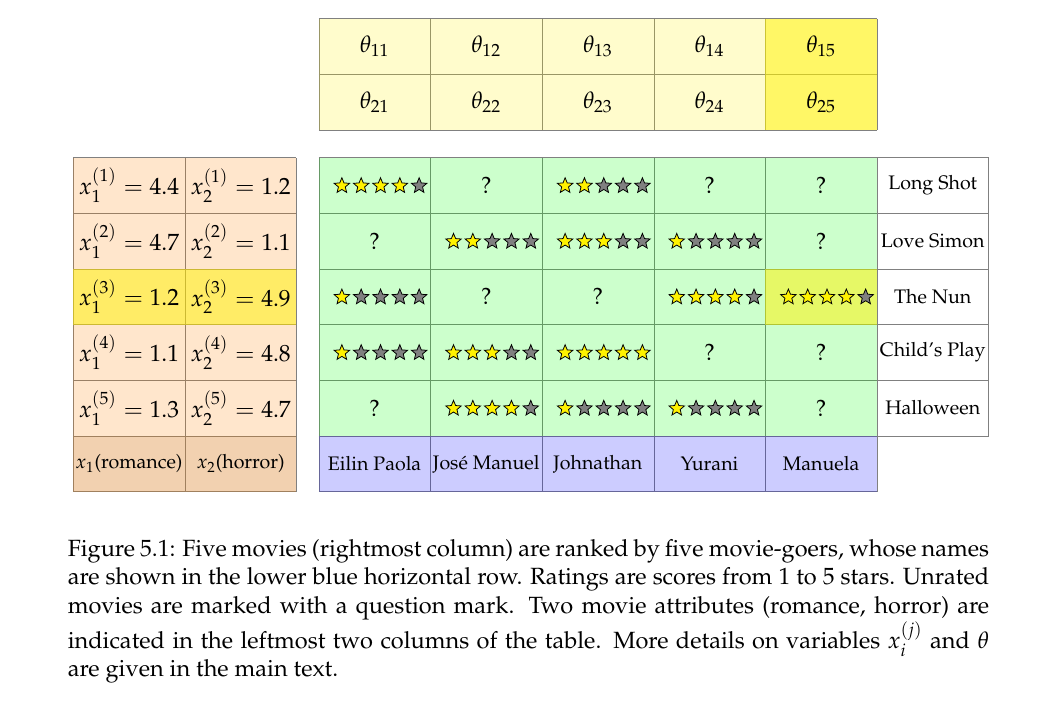

Explicada la Figura 5.1 el modelo matematico es una **regresion lineal** de la forma

$$y_{ij} = (x^{(i)})^T \Theta_j $$
donde $j$ es la columna $j$ esima de $\Theta$.

(los $y$s son los verdes)
En particular la componente $y_{35}$. Esta resaltada con amarillo, corresponde a la calificacion (4 estrellas) que Manuela le dio a "The Nun".
La matematica (ver resaltados amarillos)

$$y_{35} = x_1^{(3)} \theta_{15} + x_2^{(3)} \theta_{25} = (1.2, 4.9) \cdot (\theta_{15} , \theta_{25}) = 4.0 $$

Como es regresion lineal, podemos usar la funcion de costo para regresion lineal con regularizacion. En forma matricial

$$J_\Theta = \frac12 \| Y - X \Theta \|_F^2  + \frac{\lambda}{2} \| \Theta \|_F^2  \tag{2} $$

Como hacemos con las interrogaciones?
Generamos una matriz (**masking** $R$)

$$r_{ij} =
\begin{cases}
1 \quad , \quad \text{si la pelicula $i$ fue calificada por el usuario $j$} \\
0 \quad , \quad \text{de otra forma}
\end{cases} $$
Todas las interrogaciones $?$ tienen el valor 0.

Extendemos la funcion de costo (2)

$$J_\Theta = \frac12 \| R \circ (Y - X \Theta) \|_F^2  + \frac{\lambda}{2} \| \Theta \|_F^2   \tag{3} $$
donde $\circ$ es el producto Hadamard.
Una vez se tenga la funcion de costo  (3) se calcula su gradiente y se halla $\Theta$ de la forma como se hizo cuando se estudio regresion lineal.

## Filtro Colaborativo.
Se usan los criterios de otros (que son parecidos a los mios) para la recomendacion.

En este caso, probablemente no sabemos $X$?  Podemos pensar por un momento que conocemos $\Theta$.  Resolvemos el problema con una funcion de costo

$$\frac12 \| R \circ (Y - X \Theta) \|_F^2 + \frac{\lambda}{2} \| X \|_F^2  \tag{4} $$

Hagamos el analisis basados en la Figura 5.2

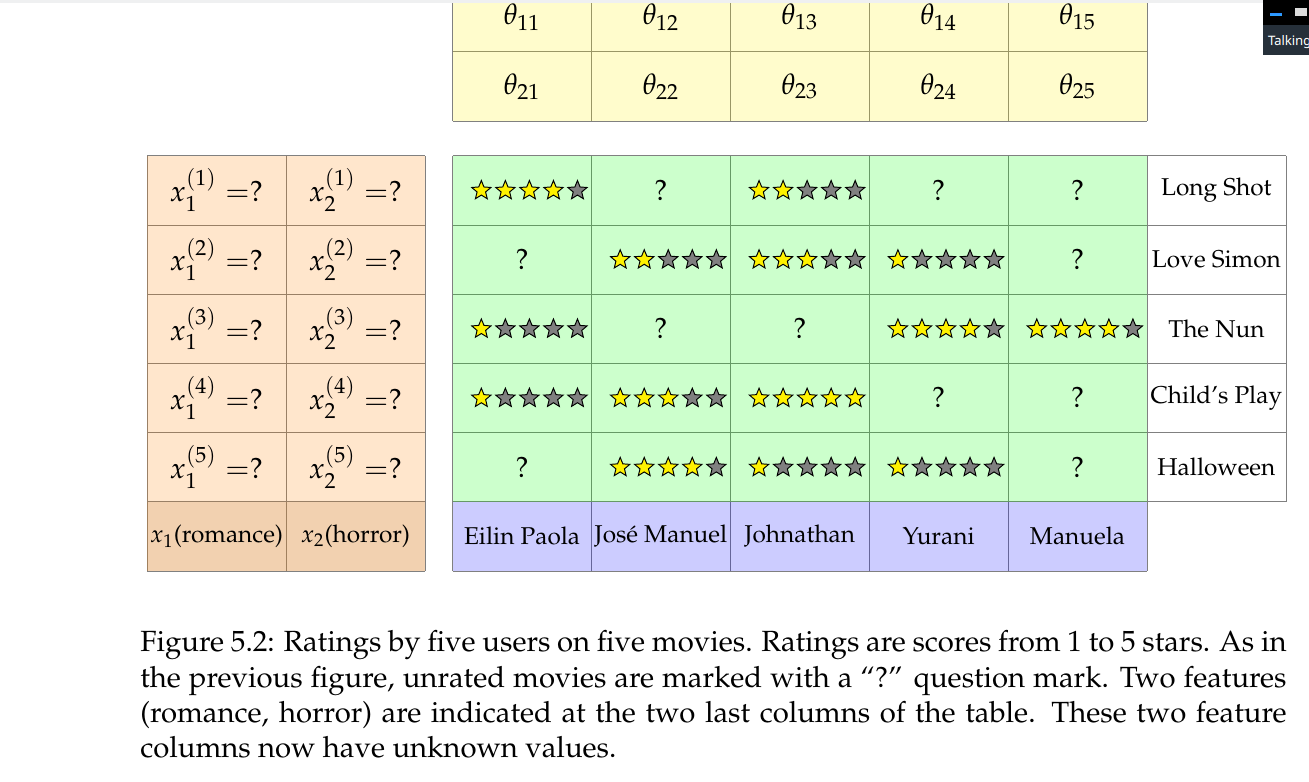

Que hacemos si no conocemos ni $X$ ni $\Theta$?

Hay dos caminos:

* Iterativo entre $X_k$ y $\Theta_k$
* Inversion conjunta (join inversion).

### Metodo iterativo.
Comenzamo con un $X_1$ aleatorio. Con este $X_1$ resolvemos la Ecuacion (3) para encontrar $\Theta_1$.  Con $\Theta_1$ resolvemos la Ecuacion (4) para $X_2$, con $X_2$ la (3) para $\Theta_2$ y asi sucesivamente. Es decir tenemos las siguientes soluciones basadas en los sistemas (3) y (4).

$$X_1 \to \Theta_1 \to X_2 \to \Theta_2 \to \cdots \to X_n \to \Theta_n $$
hasta donde $n$? hasta que las funciones de costo hallan rebajado por debajo de un umbral.

### Inversion conjunta.
Aca formulamos una funcion de costo que incluya tanto a $X$ como a $\Theta$

$$J = J(\Theta, X) = \frac12 \| R \circ ( Y - X \Theta) \|_F^2  
+ \frac{\lambda}{2} (  \| \Theta \|_F^2 + \| X \|_F^2 ) \tag{5} $$

Para invertir con respecto a $X$ hallamos el gradiente con respecto a $X$.

#### Analisis dimensional.
* Donde vive $X$?:

$X$ vive en $\mathbb{R}^{n_m \times n_f}$ donde $n_m$ es el numero de "movies" y $n_f$ el numero de "features".

* Donde vide $\Theta$?

$\Theta$ vive en $\mathbb{R}^{n_f \times n_u}$ donde $n_u$ es el numero de usuarios.


* Donde vive $Y$ ?

$Y \in \mathbb{R}^{n_m \times n_u}$.

De forma en componentes (granulada)
$$J = \frac12 \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij}
\left ( y_{ij} - \sum_{k=1}^{n_f} x_{ik} \theta_{kj}  \right )^2
+
\frac{\lambda}{2}
\left (
    \sum_{i=1}^{n_f}  \sum_{j=1}^{n_u} \theta_{ij}^2 +
    \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} x_{ij}^2
    \right ) $$

Para hallar $\nabla_X J$ tomamos las derivadas parciales con respecto a $x_{st}$.

$$\frac{\partial J}{\partial x_{st}} =  \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij}
\left ( \sum_{k=1}^{n_f} x_{ik} \theta_{kj} - y_{ij}  \right ) \sum_{k=1}^{n_f} \theta_{kj} \frac{\partial x_{ik}}{\partial x_{st}}+
\lambda \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} \frac{\partial x_{ij}}{\partial x_{st}} x_{ij}.
$$
Voy a cambiar el indice $k$ de la 4ta sumatoria por $p$ y obtenemos

Recuerde
$$\frac{\partial x_{ik}}{\partial x_{st}} = \delta_{is} \delta_{kt} $$


\begin{eqnarray}
\frac{\partial J}{\partial x_{st}} &=&  \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij}
\left ( \sum_{k=1}^{n_f} x_{ik} \theta_{kj} - y_{ij}  \right ) \sum_{p=1}^{n_f} \theta_{pj} \frac{\partial x_{ip}}{\partial x_{st}}+
\lambda \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} \frac{\partial x_{ij}}{\partial x_{st}} x_{ij} \\
&=&
\sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij}
\left ( \sum_{k=1}^{n_f} x_{ik} \theta_{kj} - y_{ij}  \right ) \sum_{p=1}^{n_f} \theta_{pj} \delta_{is} \delta_{pt} +
\lambda \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} \delta_{is} \delta_{jt} x_{ij}  \\
&=& \sum_{j=1}^{n_u} r_{sj} \left (
    \sum_{k=1}^{n_f} x_{sk} \theta_{kj} - y_{sj} \right ) \theta_{tj} + \lambda
    x_{st}
\end{eqnarray}

En forma matricial esto es:

$$\nabla_X J = [ R \circ (X \Theta - Y)] \Theta^T $$

Se deja como ejercicio probar que

$$\nabla_{\Theta} J = X^T [ R \circ (X \Theta - Y)] + \lambda \Theta $$
la prueba de esto es casi identica.
Con estos dos gradientes se puede hacer la minimizacion simultanea en $X$ y en $\Theta$.


Una vez se tiene $X, \Theta$ el rating se calcula con la formula

$$\text{rating}_{ij} = y_{ij} = (X^{(i)})^T \Theta_j $$

Esto es importante por que ya tenemos todas las etiquetas verdes (rating).
Ahora bien comparamos la diferencia entre peliculas.

$$\| X^{(i)} - X^{(j)} \| $$
Si conocemos el rating para la pelicula "$i$", y la pelicula $j$ es la mas cercana de todas a la pelicula "$i$" entonces podemos recomendarle a $j$ que vea la pelicula $i$.

## Mean normalizacion: Normalizacion por la media.
Para un usuario $j$ podemos separar una funcion de costo
$J^{(j)}$

La funcion de costo total es la funcion sobre todos los usuarios

$$J =  \sum_{j=1}^{n_u} J^{(j)}. $$

Pudiera pasar que este usuario $j$ no halla marcado ni una sola pelicula. Entonces que problema puede generar esto?

La Figura 5.3 ilustra este caso.

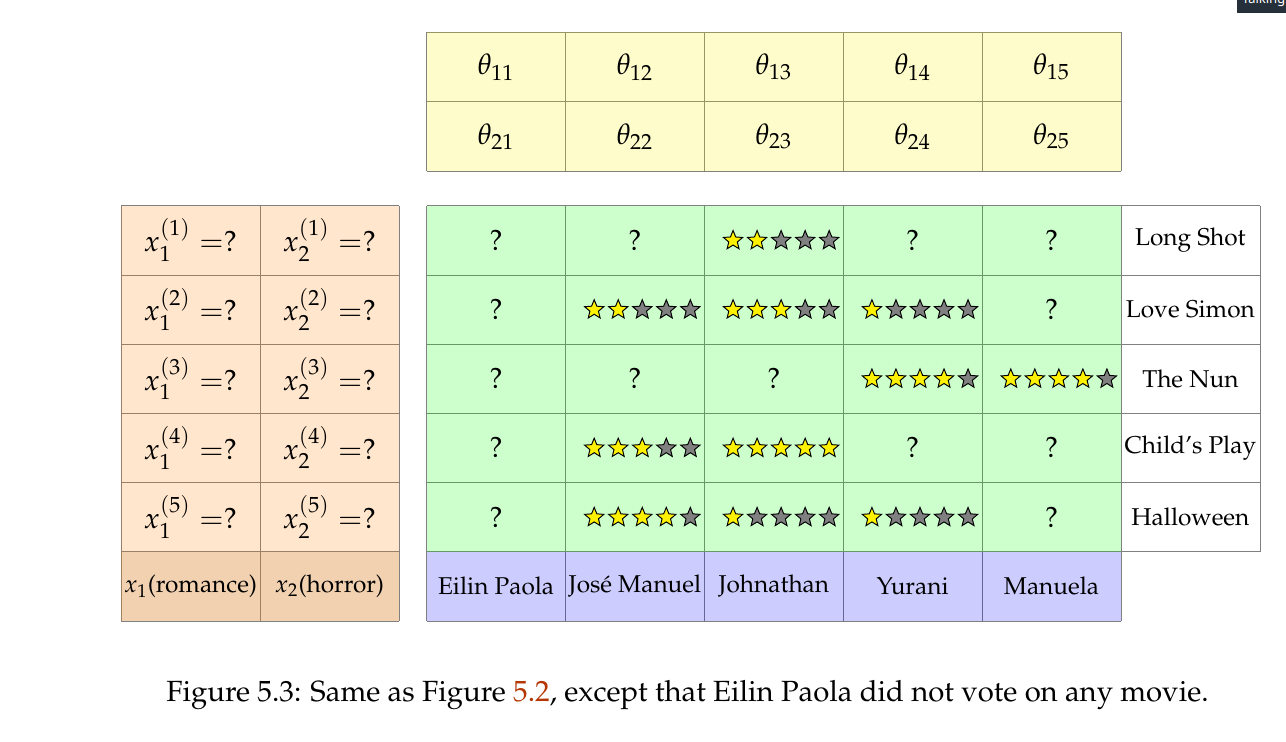

El problema con Eilin Paola es que su columna de $R$ es

$$r_{ij} = 0   \quad , \quad \text{para todas las peliculas de ella} $$

El problema es que cuando vamos calcular la funcion de costo para esta usuaria.
La Ecuacion (5). El primer termino es 0 y nos quedamos con

$$J^{(j_0)} = \frac{\lambda}{2} \| \Theta_{(j_0)} \|_F^2 + \| X \|_F^2 $$

El minimo que esto pueda tener es 0 con $\Theta = 0$. Entonces el resultado de la Etiqueta para en este caso produce

$$Y^{(ij)} = [X^{(i)}]^T \Theta_{(j)} = 0. $$

Para Eilin Paola todas las etiquetas tiene valor 0 pero eso no es cierto. El que ella no las halla calificado no quiere decir que las aborrezca.

Esto motiva la regularizacion por la media.

En que consiste la regularizacion por la media?
En las etiquetas le restamos la media por pelicula (fila) a todas las columnas.
Es decir $y_{ij} \to y_{ij} - \mu_i$. Luego resolvemos el problema con estas etiquetetas normalizadas y recobramos los las etiquetas sumando la media al final. Es decir, por ejemplo, para Eilin Paula queda que

$$y_{i1} \to (X^{(i)}^T \Theta_1 + \mu_i $$

Veamos la Figura 5.4.

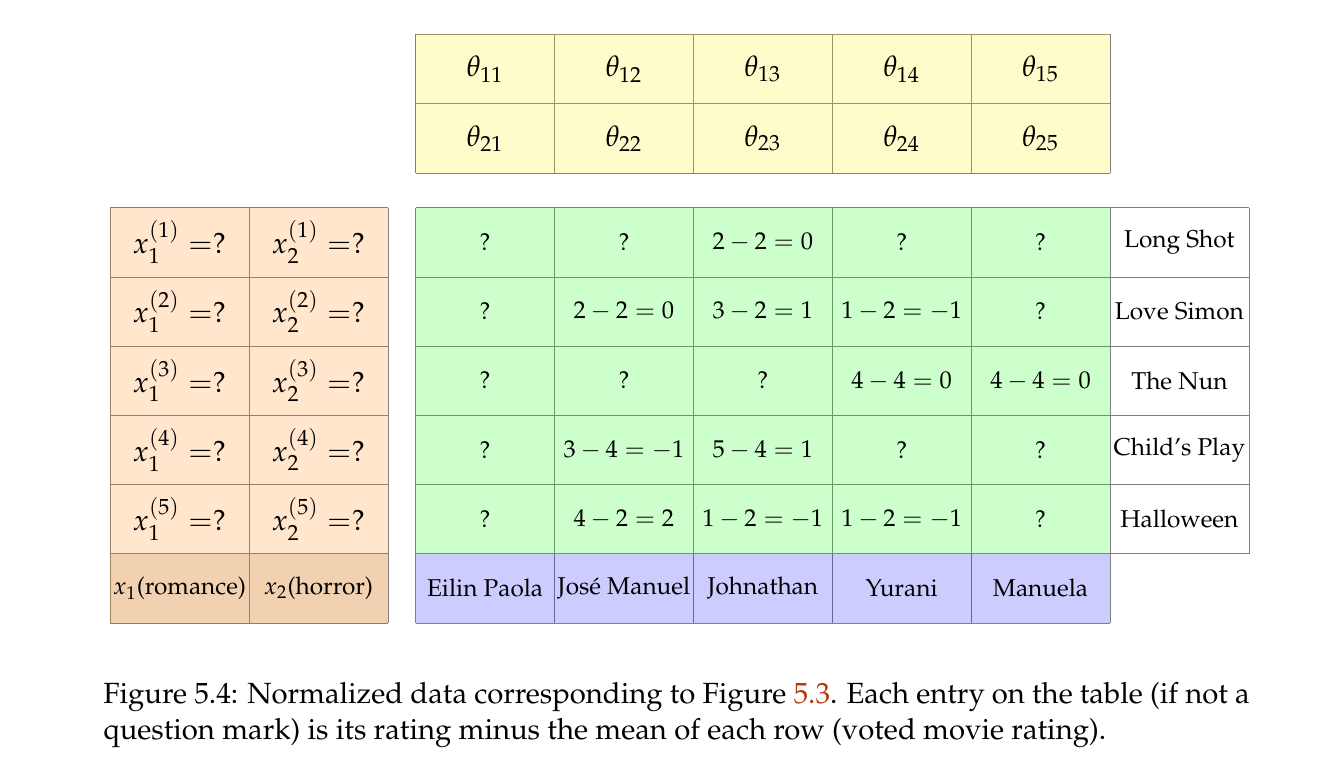

# Photo OCR: Optical Character Recognition
Por muchas razones se debe tener AI tal que se pueda sacar texto de imagenes.

1. Recuerde el libro de Rossemblat que lo tengo escaneado, escrito a maquina de escribir en 1959.... y ya lo tengo digital y los caracteres reconocidos. Puedo hacer busque. Por ejemplo el "software" Tesseract hace tipo de trabajo.

2. Hallar numeros de placas de una base de datos de fotos.

3. Autonomous driving. Necesita el software leer los signos de trafico. Por ejemplo STOP.

4. etc.

La tecnica que se usa se puede escribir en 4 pasos:

1. Deteccion de texto. Buscar en la foto donde o si hay o si no hay texto.
2. Segmentacion de texto (character segmentation). Se divide el texto en letras.
3. Clasificacion de caracteres. Por ejemplo lo que hacemos con el MNIST.
4. Se forman las palabras y con un procesador de palabara se pule el resultado.

La Figura 5.5 ilustra la deteccion de texto.

Se hace un barrido con "bounding boxes" de izquierda a derecha y de arriba abajo buscando texto. Previamente hay entrenamiento donde se muestre como se vel texto.

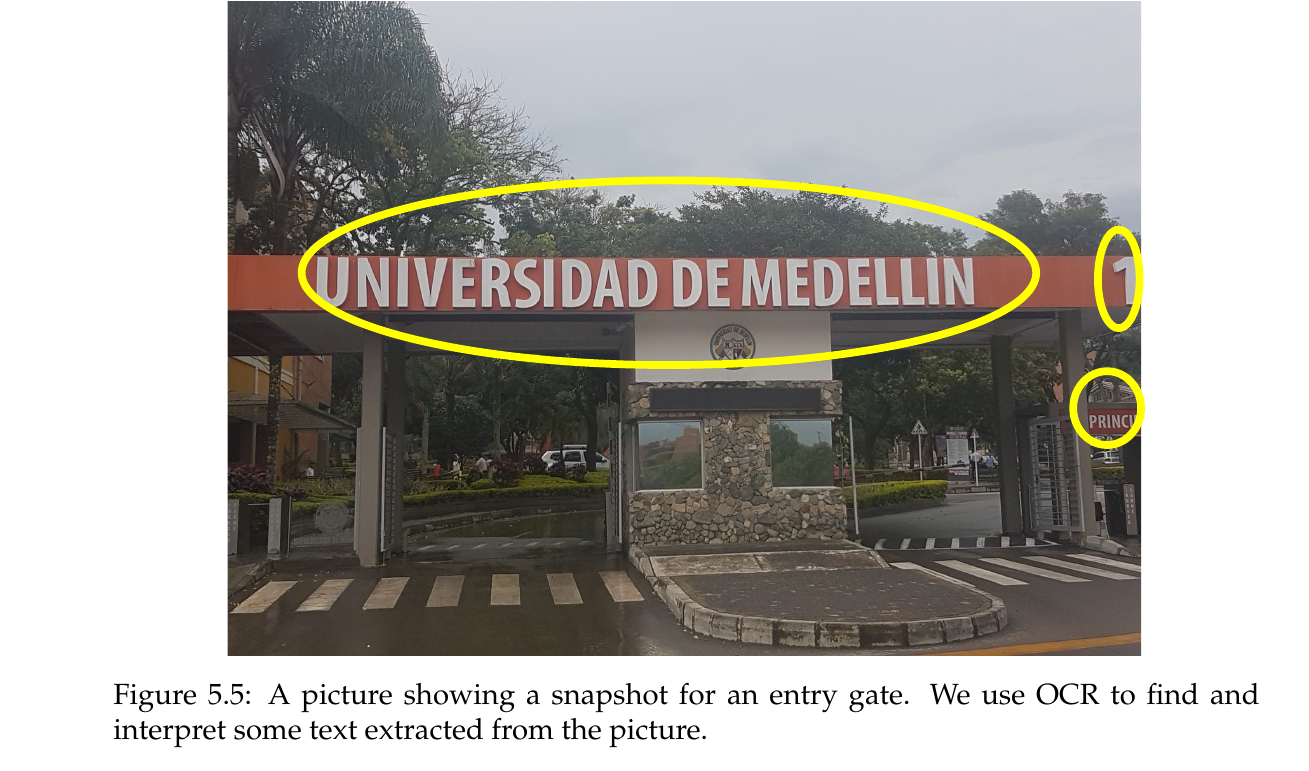

Veamos los pasos en una figura.



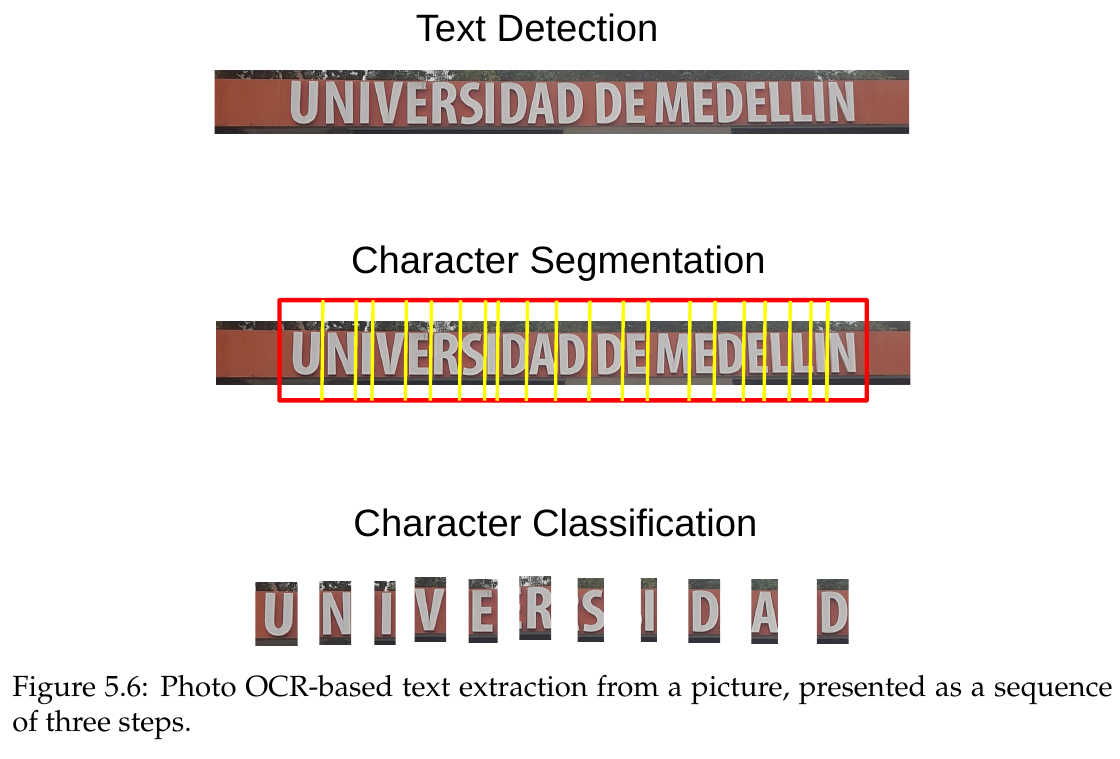

Este tipo de proceso se llama en ingles Pipeline. La Figura 5.7 muestra este "pipeline"

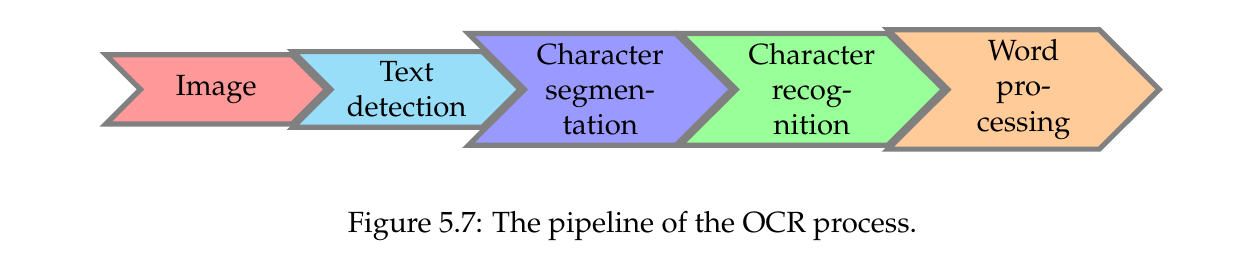

### Identificacion de Texto.
Como se segmenta el texto?
Primero toca buscar el texto mediante un entrenamiento. Por ejemplo, la Figura 5.8 ilustra casos de muestras positivas $y=1$ y negativas $y=0$.

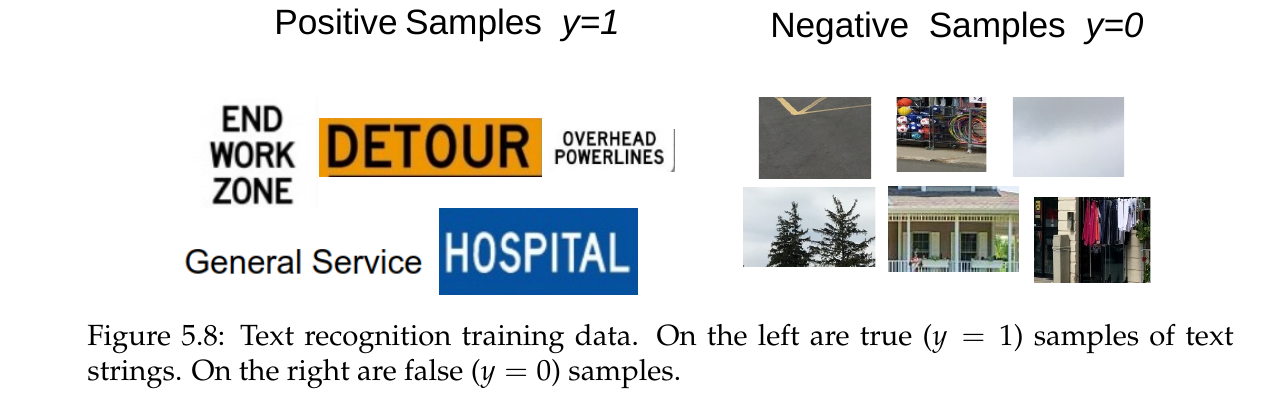

### Segmentacion.
Como se hace?

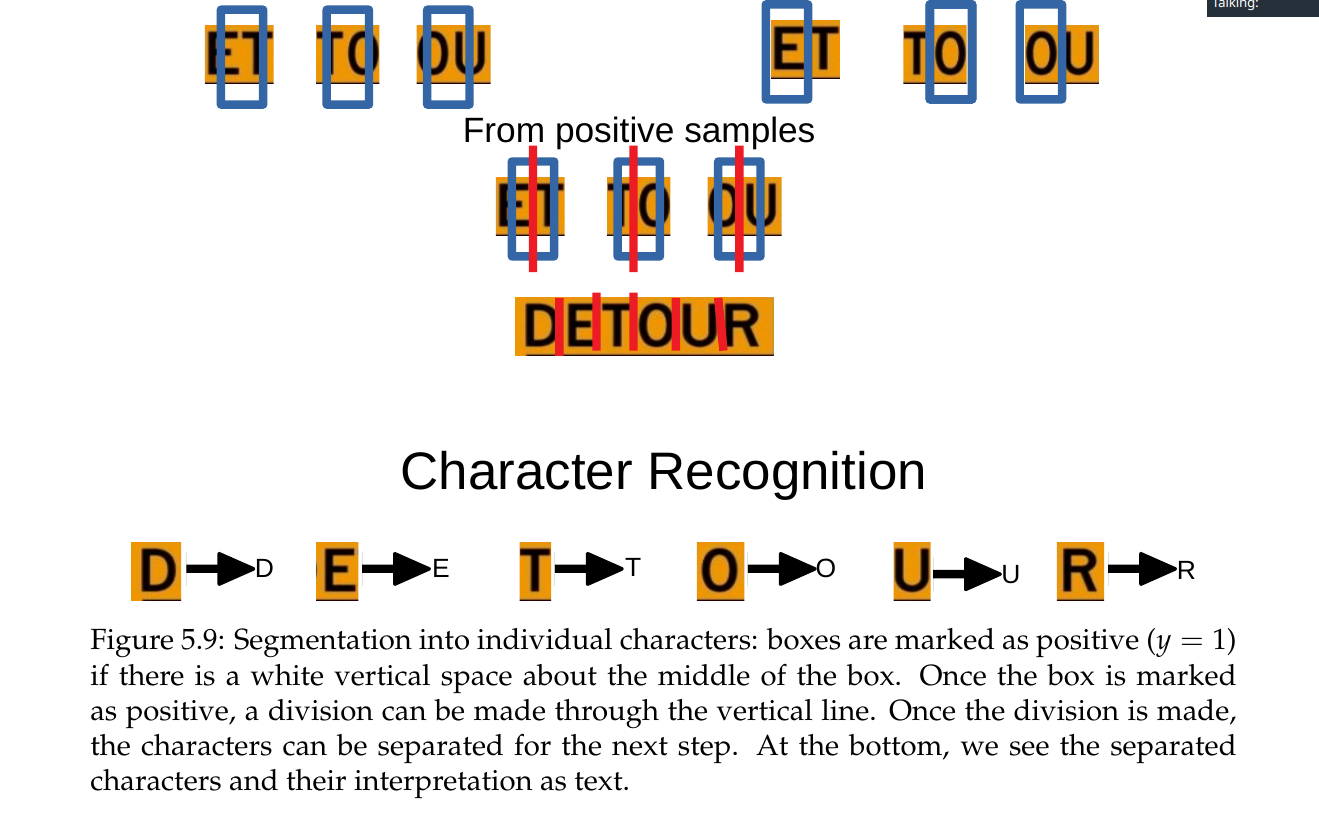